<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Coursera TensorFlow Week 2 

Import TensorFlow

In [28]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
mnist = tf.keras.datasets.fashion_mnist

Get the training and test data

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

See our image data

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

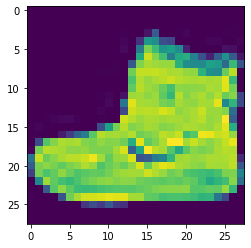

In [31]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])


Normalize our data from 0 - 255 into 0 - 1

In [32]:
training_images = training_images / 255.0
test_images = test_images / 255.0
print(training_labels[0])
print(training_images[0])


9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

Define the model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

Let's build the model

In [34]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4978 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3772 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2978 - accuracy: 0.8895


Let's test the model against the test data

In [35]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8746


[0.34593796730041504, 0.8745999932289124]

Apparently, our model accuracy is slightly decreased when used against the training data. But it's ok considering we only run 5 epochs.

In [36]:
classifications = model.predict(test_images)

print(classifications[0])

print(test_labels[0])

[8.0158947e-07 7.1048185e-09 1.4109590e-07 1.8362954e-08 1.8531428e-07 1.4040402e-02 4.9257829e-07 1.5265857e-02 2.4617279e-05 9.7066742e-01]
9


Now, let's try using 512 neurons

In [38]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics='accuracy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc2
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1838 - accuracy: 0.9452
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0742 - accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9814
[9.1688777e-13 7.0163521e-11 1.8395427e-08 2.7880833e-06 1.6096116e-12 2.4247078e-11 1.3031837e-14 9.9999726e-01 3.2787734e-10 5.2635393e-08]
7


The running time is slower but it increased accuracy.

What would happen if we move the Flatten() layer.

In [39]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc2
Epoch 1/5


ValueError: ignored

What happens when the last layer is not 10? Try with 5

In [40]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc2
Epoch 1/5


InvalidArgumentError: ignored

Yup, it's error.

Consider an additional layer between the first and second layer.

In [42]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc2
Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1833
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0789
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0542
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0422
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0874
[1.1164397e-11 1.0906213e-07 1.1061226e-09 1.4413462e-06 1.3519891e-09 3.2249739e-10 4.1987542e-13 9.9998760e-01 1.3127774e-08 1.0807128e-05]
7


It did not have any significant effect.

What happens if we did not normalize the training data?

In [43]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0-rc2
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5645
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3410
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3167
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3378
[1.1249650e-23 4.0056354e-09 3.5178882e-10 4.0832764e-09 1.7538289e-24 1.3793960e-19 1.0681896e-35 1.0000000e+00 7.5694252e-14 1.5639574e-16]
7


We have much higher loss, meaning that less accuracy of the model.

Try using a callback

In [48]:
import tensorflow as tf
print(tf.__version__)

# create the callback
# once a training have reached 70% accuracy, the training will be stopped
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.2.0-rc2
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4721
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3598
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3230
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3004
Epoch 5/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.2803
Reached 70% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808
